# Nombre Estudiante: Carlos Astudillo
# Asignatura: Minería de datos
# Nombre Docente: Verónica Chimbo
# Fecha Elaboración: 6/12/2024
# Actividad: Prueba Practica

# Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

#  Cargar la data

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv'
df = pd.read_csv(url)
print(df.head())

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-04-01 21:58:49   
1  22001.0     Acadia       Louisiana             US  2020-04-01 21:58:49   
2  51001.0   Accomack        Virginia             US  2020-04-01 21:58:49   
3  16001.0        Ada           Idaho             US  2020-04-01 21:58:49   
4  19001.0      Adair            Iowa             US  2020-04-01 21:58:49   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          4       0          0       4   
1  30.295065  -92.414197         47       1          0      46   
2  37.767072  -75.632346          7       0          0       7   
3  43.452658 -116.241552        195       3          0     192   
4  41.330756  -94.471059          1       0          0       1   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  


# Conociendo los datos:

In [3]:
df.shape

(2522, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2175 non-null   float64
 1   Admin2          2221 non-null   object 
 2   Province_State  2338 non-null   object 
 3   Country_Region  2522 non-null   object 
 4   Last_Update     2522 non-null   object 
 5   Lat             2518 non-null   float64
 6   Long_           2518 non-null   float64
 7   Confirmed       2522 non-null   int64  
 8   Deaths          2522 non-null   int64  
 9   Recovered       2522 non-null   int64  
 10  Active          2522 non-null   int64  
 11  Combined_Key    2522 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 236.6+ KB


In [8]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,4,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,46,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,7,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,192,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


# Identificar los tipos de datos

In [5]:
df.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

# Identificar datos faltantes

In [6]:
print(df.isnull().sum())

FIPS              347
Admin2            301
Province_State    184
Country_Region      0
Last_Update         0
Lat                 4
Long_               4
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


# Identificar datos atípicos

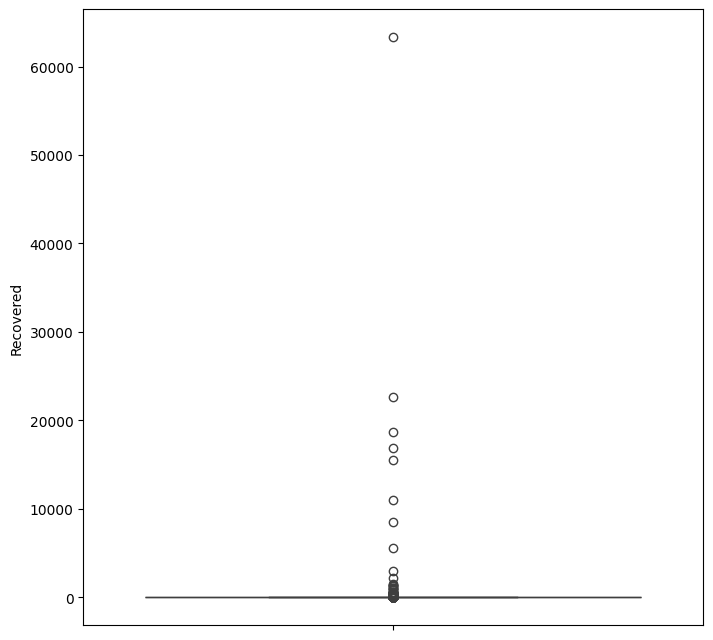

In [7]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["Recovered"])
plt.show()

<Axes: xlabel='Country_Region', ylabel='Province_State'>

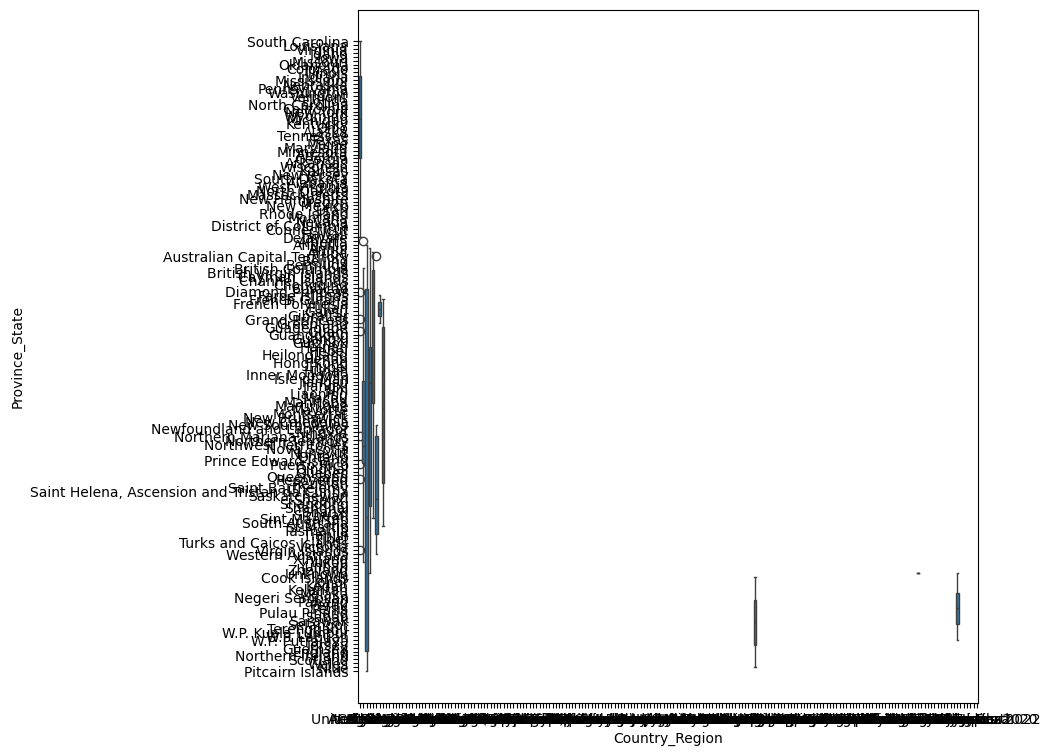

In [9]:
fig = plt.figure(figsize=(8,9))
sns.boxplot(x="Country_Region", y="Province_State", data=df)

# Calcular las Estadisticas

In [10]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2175.000000,2518.000000,2518.000000,2522.000000,2522.000000,2522.000000,2522.000000
mean,30114.640920,35.289228,-75.615792,372.307296,20.477002,76.656622,278.524187
std,15643.080021,12.149460,47.809329,4174.952692,363.948042,1494.960160,2945.050096
min,1001.000000,-71.949900,-175.198200,0.000000,0.000000,0.000000,0.000000
25%,18052.000000,33.086811,-94.749118,2.000000,0.000000,0.000000,2.000000
50%,29031.000000,37.526763,-86.065254,7.000000,0.000000,0.000000,6.000000
75%,45024.000000,41.406878,-79.042655,34.000000,1.000000,0.000000,31.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


In [11]:
df.describe(include=['object'])

,Admin2,Province_State,Country_Region,Last_Update,Combined_Key
count,2221,2338,2522,2522,2522
unique,1388,162,190,35,2522
top,Unassigned,Texas,US,2020-04-01 21:58:49,"Abbeville, South Carolina, US"
freq,32,141,2228,2265,1


# Análisis de tendencia central, posición y dispersión

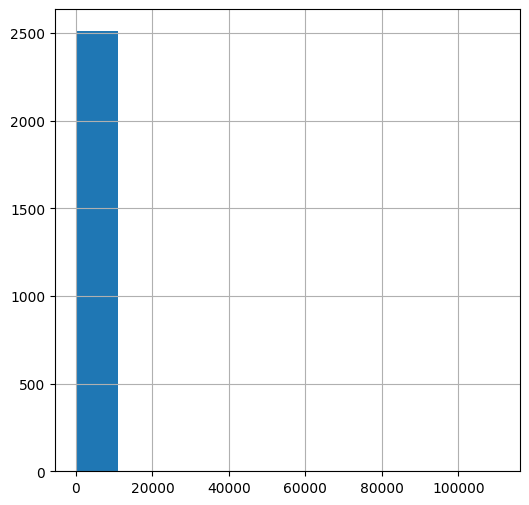

In [12]:
df['Confirmed'].hist(figsize=(6,6))
plt.show()

In [13]:
mean = df['Confirmed'].mean()
median = df['Confirmed'].median()
mode = df['Confirmed'].mode()[0]
skew = df['Confirmed'].skew()
kurt = df['Confirmed'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 372.3072957969865
La mediana es: 7.0
La moda es: 1
El sesgo es: 19.946002128469456
La kurtosis es: 442.96873884755126


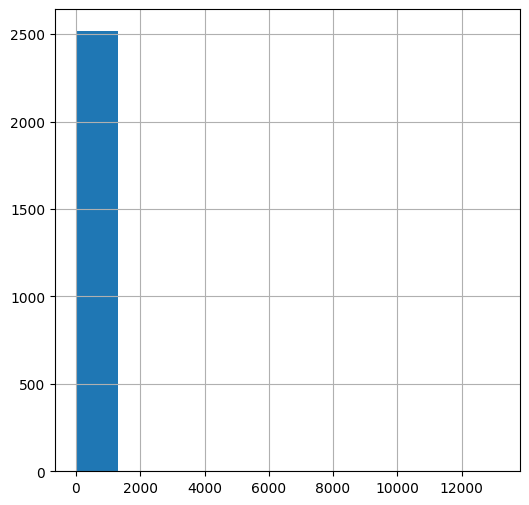

In [14]:
df['Deaths'].hist(figsize=(6,6))
plt.show()

In [15]:
mean = df['Deaths'].mean()
median = df['Deaths'].median()
mode = df['Deaths'].mode()
skew = df['Deaths'].skew()
kurt = df['Deaths'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 20.477002379064235
La mediana es: 0.0
La moda es: 0    0
Name: Deaths, dtype: int64
El sesgo es: 27.946127871168613
La kurtosis es: 877.8779731251473


# Contando datos duplicados

In [16]:
df.duplicated().sum()

0

# Análisis de variables numéricas

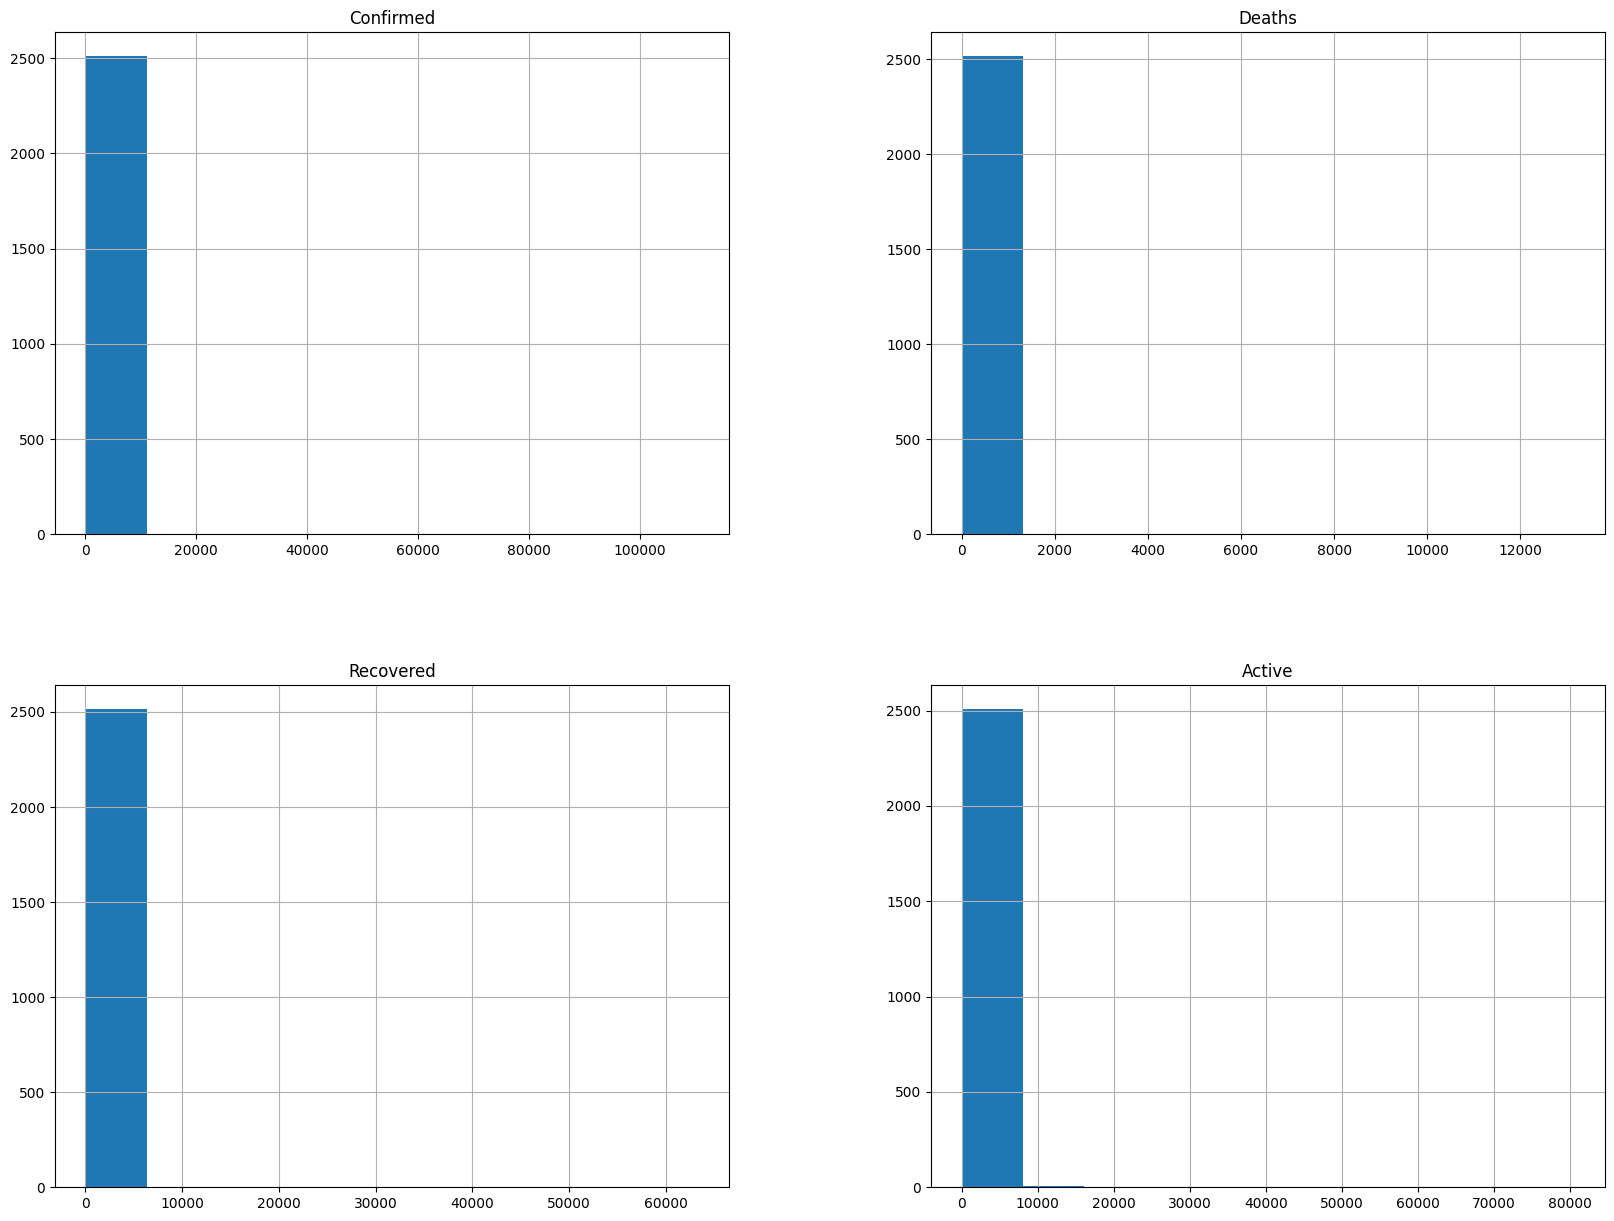

In [17]:
import matplotlib.pyplot as plt

# Generar histogramas para las columnas numéricas relevantes
df[['Confirmed', 'Deaths', 'Recovered', 'Active']].hist(figsize=(20, 15))

plt.show()

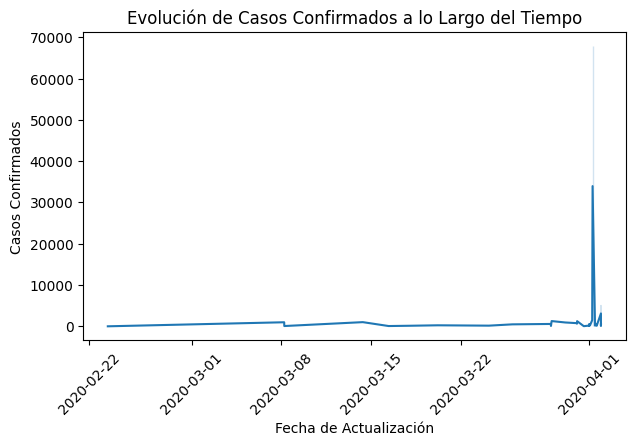

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'Last_Update' esté en formato datetime
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

# Crear la figura y el gráfico
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.xticks(rotation=45, fontsize=10)
sns.lineplot(data=df, x='Last_Update', y='Confirmed')

plt.xlabel('Fecha de Actualización')
plt.ylabel('Casos Confirmados')
plt.title('Evolución de Casos Confirmados a lo Largo del Tiempo')
plt.show()

# Análisis de variables categóricas

In [37]:
df_cat = df.select_dtypes(include=['object'])

df_cat.head()

,Admin2,Province_State,Country_Region,Combined_Key
0,Abbeville,South Carolina,US,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,"Accomack, Virginia, US"
3,Ada,Idaho,US,"Ada, Idaho, US"
4,Adair,Iowa,US,"Adair, Iowa, US"


In [38]:
df_cat = df.select_dtypes(include=['object'])

for col in df_cat.columns:
    print(f"{col}: \n{df_cat[col].unique()}\n")

Admin2: 
['Abbeville' 'Acadia' 'Accomack' ... 'Yuba' 'Yuma' 'no hay registro']

Province_State: 
['South Carolina' 'Louisiana' 'Virginia' 'Idaho' 'Iowa' 'Missouri'
 'Oklahoma' 'Colorado' 'Illinois' 'Indiana' 'Mississippi' 'Nebraska'
 'Pennsylvania' 'Washington' 'Vermont' 'Florida' 'North Carolina'
 'California' 'New York' 'Wyoming' 'Michigan' 'Kentucky' 'Ohio' 'Alaska'
 'Tennessee' 'Texas' 'Maine' 'Maryland' 'Minnesota' 'Arizona' 'Georgia'
 'Arkansas' 'Wisconsin' 'Kansas' 'New Jersey' 'South Dakota' 'Alabama'
 'West Virginia' 'North Dakota' 'Massachusetts' 'New Hampshire' 'Oregon'
 'New Mexico' 'Utah' 'Rhode Island' 'Montana' 'Nevada'
 'District of Columbia' 'Connecticut' 'Hawaii' 'Delaware' 'Alberta'
 'Anguilla' 'Anhui' 'Aruba' 'Australian Capital Territory' 'Beijing'
 'Bermuda' 'British Columbia' 'British Virgin Islands' 'Cayman Islands'
 'Channel Islands' 'Chongqing' 'Curacao' 'Diamond Princess'
 'Faroe Islands' 'French Guiana' 'French Polynesia' 'Fujian' 'Gansu'
 'Gibraltar' 'Grand

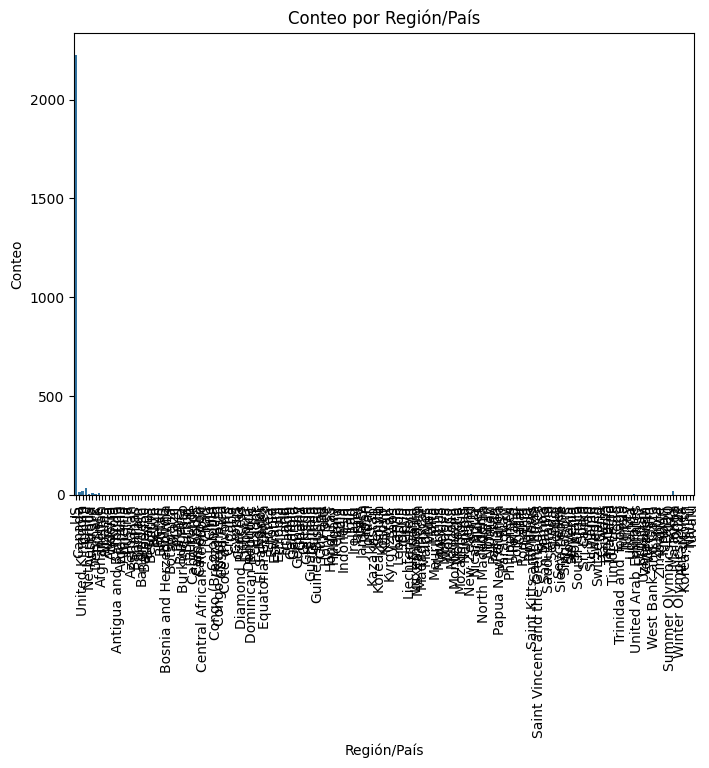

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de conteo de la columna 'Country_Region'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Country_Region')
plt.xticks(rotation=90)
plt.xlabel('Región/País')
plt.ylabel('Conteo')
plt.title('Conteo por Región/País')
plt.show()

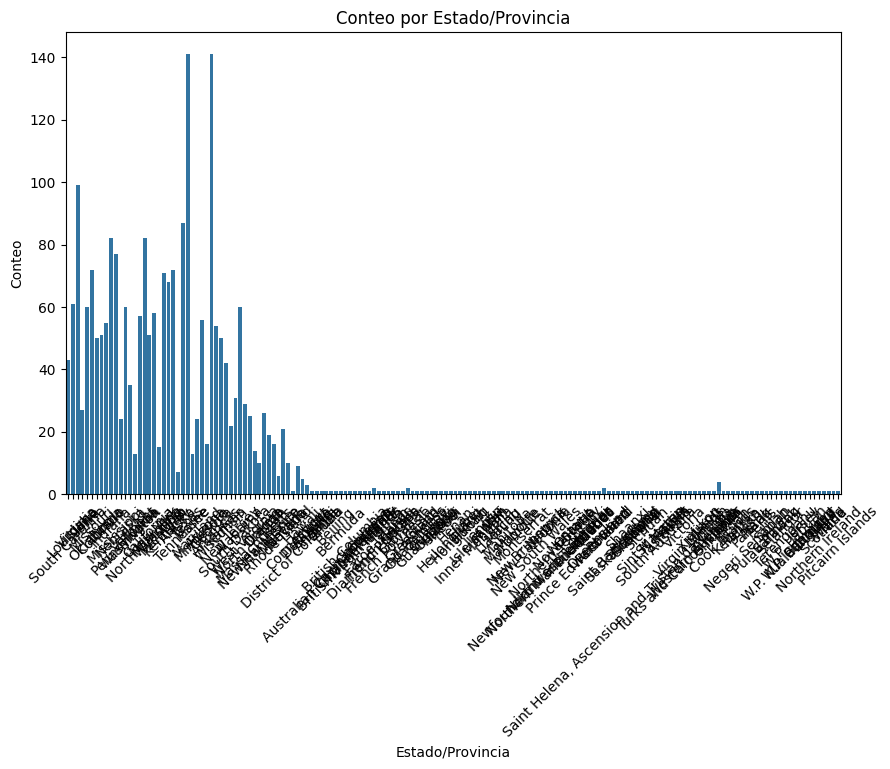

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de conteo de la columna 'Province_State'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Province_State')
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Estado/Provincia')
plt.ylabel('Conteo')
plt.title('Conteo por Estado/Provincia')
plt.show()

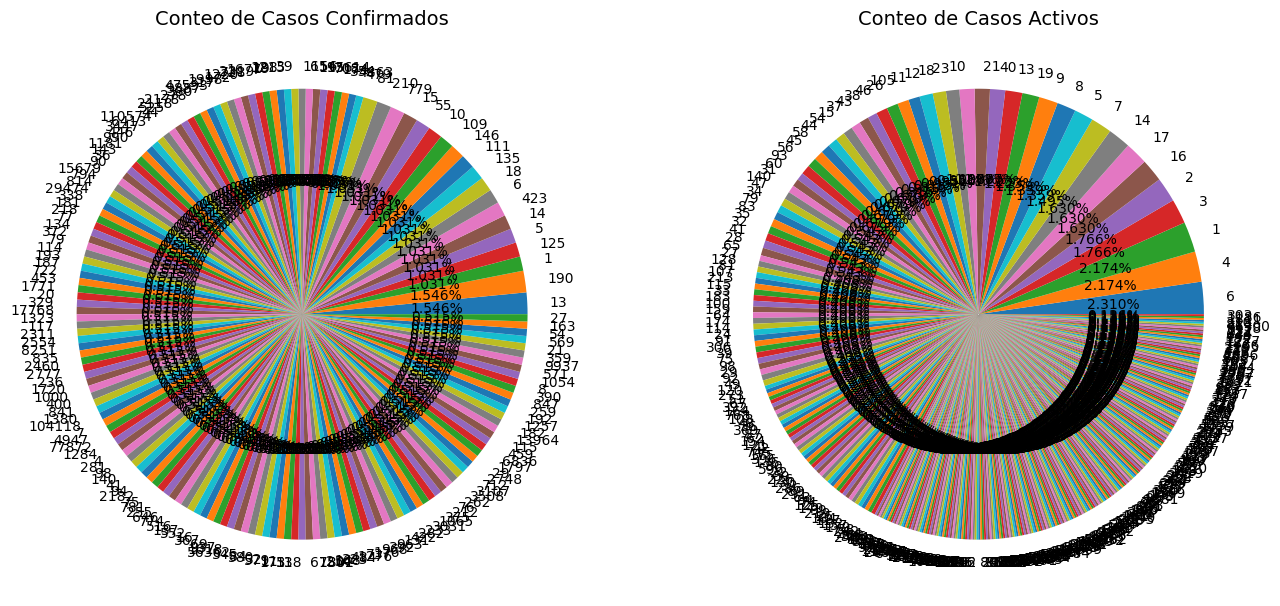

In [23]:
import matplotlib.pyplot as plt

# Separamos los grupos por alguna condición relevante y solo con reservas no canceladas
rh = df.loc[(df['Confirmed'] > 0) & (df['Recovered'] > 0)]
ch = df.loc[(df['Active'] > 0) & (df['Deaths'] > 0)]

# Ajustamos tamaño de la figura
fig = plt.figure(figsize=(16, 9))

# Gráfico de barras para una condición
ax1 = fig.add_subplot(121)
rh_counts = rh['Confirmed'].value_counts()
ax1.set_title('Conteo de Casos Confirmados', fontsize=14)
ax1.pie(x=rh_counts, labels=rh_counts.index, autopct='%.3f%%')

# Gráfico de barras para otra condición
ax2 = fig.add_subplot(122)
ch_counts = ch['Active'].value_counts()
ax2.set_title('Conteo de Casos Activos', fontsize=14)
ax2.pie(x=ch_counts, labels=ch_counts.index, autopct='%.3f%%')

plt.show()

# Combinando variables

<function matplotlib.pyplot.savefig(*args, **kwargs)>

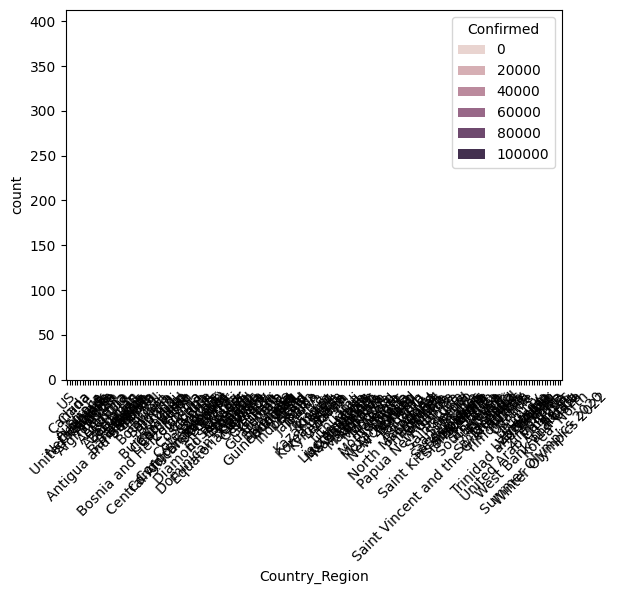

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Country_Region', hue='Confirmed')
plt.xticks(rotation=45, fontsize=10)
plt.savefig

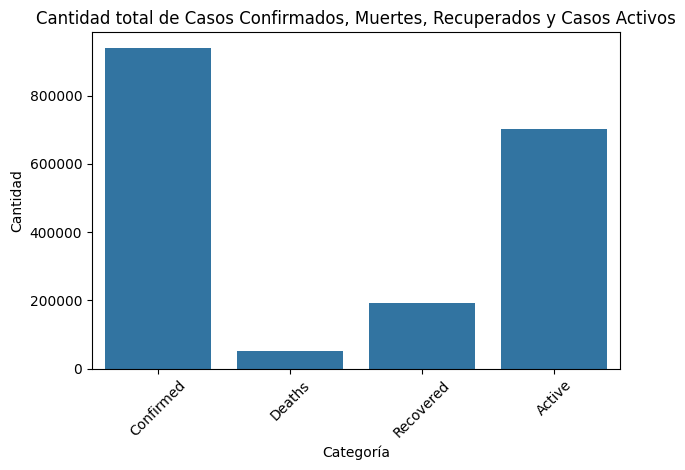

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que quieres graficar los casos confirmados, muertes, recuperados y casos activos
# Ajusta las variables según las columnas disponibles en tu DataFrame

sns.barplot(x=['Confirmed', 'Deaths', 'Recovered', 'Active'],
            y=[df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum(), df['Active'].sum()])

plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad total de Casos Confirmados, Muertes, Recuperados y Casos Activos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Limpieza de datos

In [26]:
print(df.isnull().sum())

FIPS              347
Admin2            301
Province_State    184
Country_Region      0
Last_Update         0
Lat                 4
Long_               4
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


In [27]:
df.dtypes

FIPS                     float64
Admin2                    object
Province_State            object
Country_Region            object
Last_Update       datetime64[ns]
Lat                      float64
Long_                    float64
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
Combined_Key              object
dtype: object

In [28]:
promedio_fips = df['FIPS'].mean()

In [29]:
df['FIPS'].fillna(promedio_fips, inplace=True)

In [30]:
df['Admin2'].fillna('no hay registro', inplace=True)

In [31]:
df['Province_State'].fillna('no hay registro', inplace=True)

In [32]:
promedio_Lat = df['Lat'].mean()

In [33]:
df['Lat'].fillna(promedio_Lat, inplace=True)

In [34]:
promedio_Long = df['Long_'].mean()

In [35]:
df['Long_'].fillna(promedio_Long, inplace=True)

# Confirmar que ya no existan valores nulos

In [36]:
# Confirmar que no existen valores nulos
print(df.isnull().sum())

FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Combined_Key      0
dtype: int64
